In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv("/content/SalaryData.csv");

In [ ]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Проверим на нулевые значения

<Axes: >

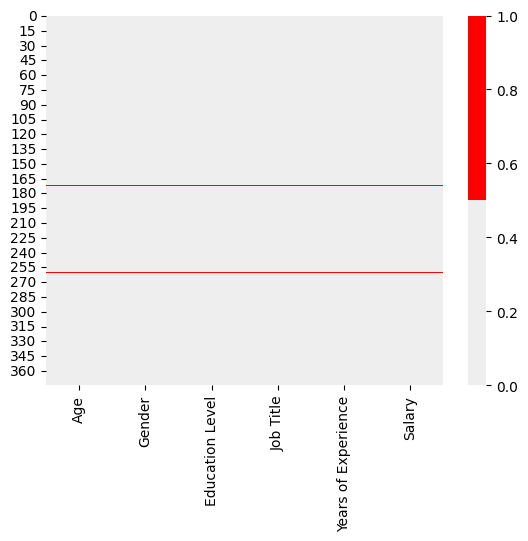

In [ ]:
cols = data.columns[:]
colours = ['#eeeeee', '#ff0000']
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in data.columns:
    pct_missing = data[col].isnull().sum()
    print('{} - {}'.format(col, round(pct_missing)))

Age - 2
Gender - 2
Education Level - 2
Job Title - 2
Years of Experience - 2
Salary - 2


In [ ]:
data = data.dropna(subset=['Salary'])

Приведем все к числовым значениям

In [ ]:
data.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [ ]:
data['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [ ]:
data["Education Level"]=data["Education Level"].map({"Bachelor's": 1, "Master's": 2, "PhD": 3})
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,1,Software Engineer,5.0,90000.0
1,28.0,Female,2,Data Analyst,3.0,65000.0
2,45.0,Male,3,Senior Manager,15.0,150000.0
3,36.0,Female,1,Sales Associate,7.0,60000.0
4,52.0,Male,2,Director,20.0,200000.0


In [ ]:
data['Gender'].value_counts()

Gender
Male      194
Female    179
Name: count, dtype: int64

In [ ]:
data["Gender"]=data["Gender"].map({"Male": 0, "Female": 1})
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,0,1,Software Engineer,5.0,90000.0
1,28.0,1,2,Data Analyst,3.0,65000.0
2,45.0,0,3,Senior Manager,15.0,150000.0
3,36.0,1,1,Sales Associate,7.0,60000.0
4,52.0,0,2,Director,20.0,200000.0


In [ ]:
data['Job Title'].value_counts()

Job Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64

In [ ]:
#преобразование строк в числа
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Job Title'] = le.fit_transform(data['Job Title'])
print(data.head())

    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       0                1        159                  5.0   90000.0
1  28.0       1                2         17                  3.0   65000.0
2  45.0       0                3        130                 15.0  150000.0
3  36.0       1                1        101                  7.0   60000.0
4  52.0       0                2         22                 20.0  200000.0


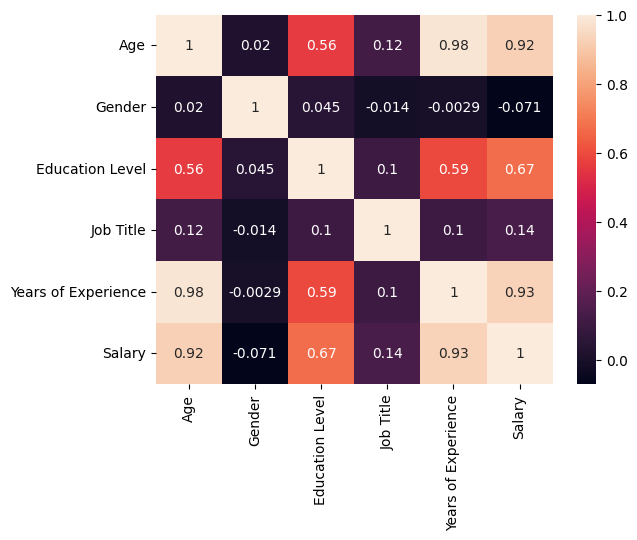

In [ ]:
hm = sns.heatmap(data.corr(),
                 cbar=True,
                 annot=True)

Из матрицы корреляции видно, что самый большой коэффициент корреляциии между опытом работы и зарплатой.

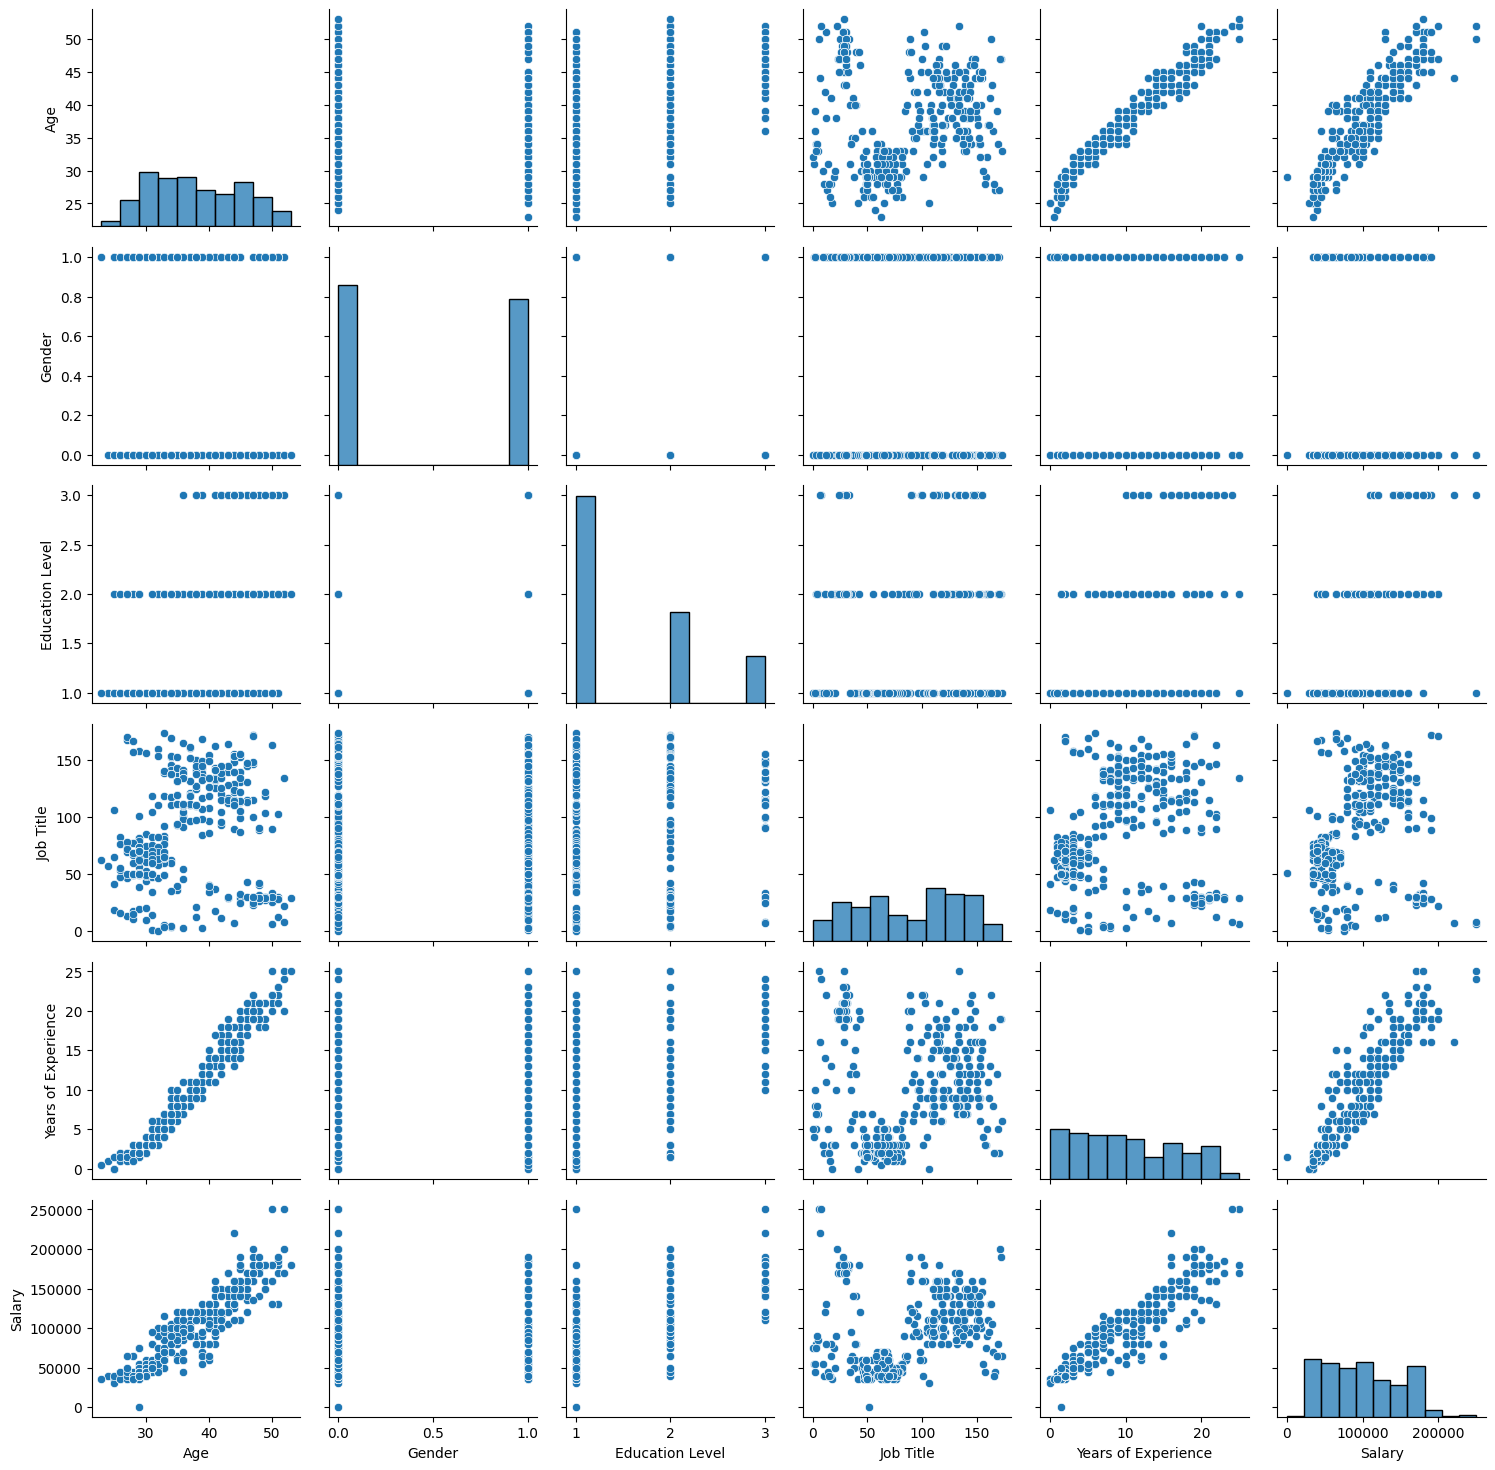

In [ ]:
g = sns.PairGrid(data)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

На матрице диаграмм разброса также можно заметить положительную линейную связь.



<Axes: xlabel='Years of Experience', ylabel='Salary'>

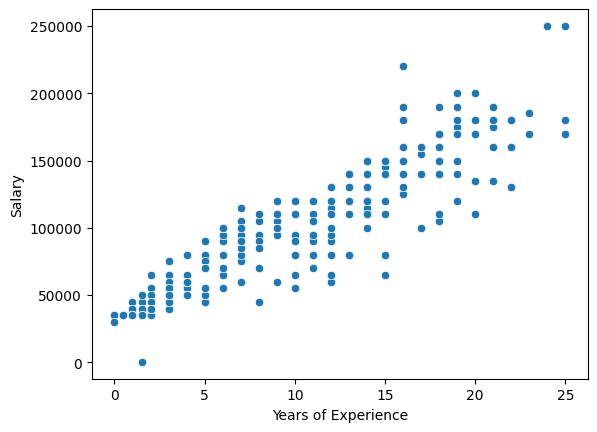

In [ ]:
sns.scatterplot(data=data, x="Years of Experience", y="Salary")

Получим модель линейной рергессии зависимости зарплаты от опыта



In [ ]:
X = data['Years of Experience'].values.reshape(-1,1)
y = data['Salary'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [ ]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

6844.510514484165
31921.21691704422
The linear model is: Y = 3.1921e+04 + 6844.5X


Визуализируем полученную модель на диаграмме разброса

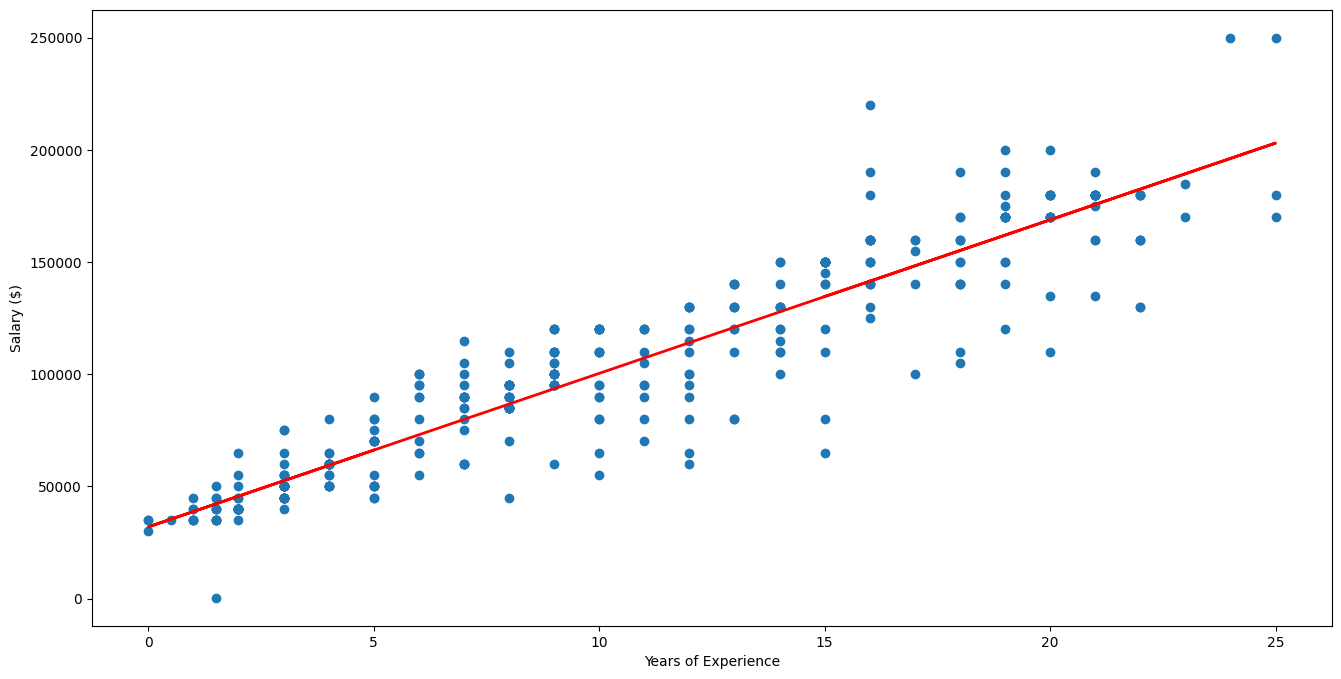

In [ ]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['Years of Experience'],
    data['Salary'],
    )
plt.plot(
    data['Years of Experience'],
    predictions,
    c='red',
    linewidth=2
)
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")
plt.show()

In [ ]:
reg.score(X, y, sample_weight=None) #коэффициент детерминации

0.865528278393677

Получим модель множественной линейной регрессии для оценки вклада в продажи остальных параметров выборки



In [ ]:
Xs = data.drop(['Salary'], axis=1)
y = data['Salary'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)

LinearRegression()

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[[ 2652.29501743 -8322.28165554 13290.95033734    27.3298712
   3156.92278531]]
[-49251.05879364]


In [ ]:
print("The linear model is: Y = {:.5} + {:.5}*Age + {:.5}*Gender + {:.5}*Education Level + {:.5}*Job Title + {:.5}*Years of experience".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2], reg.coef_[0][3], reg.coef_[0][4]))


The linear model is: Y = -4.9251e+04 + 2652.3*Age + -8322.3*Gender + 1.3291e+04*Education Level + 27.33*Job Title + 3156.9*Years of experience


In [ ]:
reg.score(Xs, y) #коэффициент детерминации

0.901060004949187

Коэффициент детерминации значительно выше, чем в модели линейной регрессии